# Lab-imbalanced-data

In [1]:
# Load the dataset and explore the variables
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('../lab-imbalanced-data/files_for_lab/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# We will try to predict variable Churn using a logistic regression on 
# variables tenure, SeniorCitizen,MonthlyCharges.
# Extract the target variable
df_selection=df[['SeniorCitizen','tenure','MonthlyCharges','Churn']]
df_selection

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


In [6]:
# Extract the independent variables and scale them
# No NaNs
df_selection.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
Churn             0
dtype: int64

In [7]:
df_selection.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
Churn              object
dtype: object

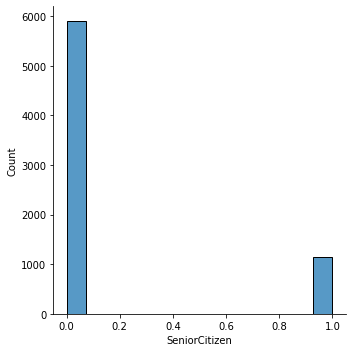

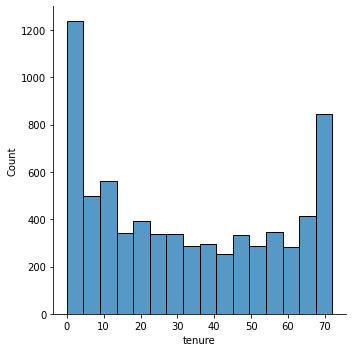

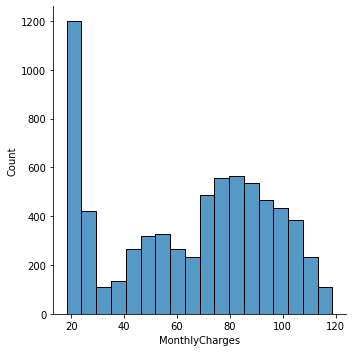

In [8]:
for col in df_selection.select_dtypes(np.number):
    sns.displot(df_selection[col])
    plt.show()

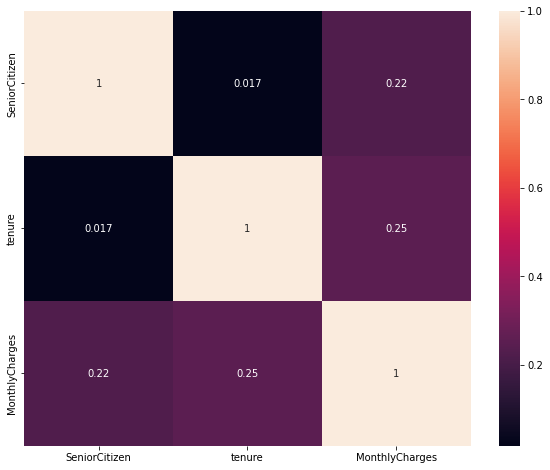

In [9]:
# No multicolinearity between independet variables
corr_matrix=df_selection.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
df_selection['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
# Changing variable to object as there are only 0 and 1 as values.
df_selection['SeniorCitizen'] = df_selection['SeniorCitizen'].astype('object') 
df_selection['SeniorCitizen'].value_counts

/var/folders/7f/8r53735s4g5_zxdncz9qd64c0000gn/T/ipykernel_55602/3632885824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection['SeniorCitizen'] = df_selection['SeniorCitizen'].astype('object')


<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: object>

In [12]:
# Evaluate the model
# Even a simple model will give us more than 70% accuracy. Why?
df_selection.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [13]:
for col in df_selection.select_dtypes('object'):
    print(df_selection[col].value_counts(), '\n')

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

No     5174
Yes    1869
Name: Churn, dtype: int64 



In [14]:
# Build the logistic regression model

In [15]:
X = df_selection.drop('Churn', axis=1)
y = df_selection['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train.value_counts()

No     4139
Yes    1495
Name: Churn, dtype: int64

In [17]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [18]:
classification.score(X_test, y_test)

0.7835344215755855

In [19]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[934, 101],
       [204, 170]])

In [20]:

from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n          No       0.82      0.90      0.86      1035\n         Yes       0.63      0.45      0.53       374\n\n    accuracy                           0.78      1409\n   macro avg       0.72      0.68      0.69      1409\nweighted avg       0.77      0.78      0.77      1409\n'

In [21]:
# Synthetic Minority Oversampling TEchnique (SMOTE) is an 
# over sampling technique based on nearest neighbors that adds new points between existing points. 
# Apply imblearn.over_sampling.SMOTE to the dataset. 
# Build and evaluate the logistic regression model. Is it there any improvement?
# SMOTE
# Uses knn to create rows with similar features from the minority classes.

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()


No     5174
Yes    5174
Name: Churn, dtype: int64

In [22]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_sm, y_sm)

LogisticRegression(max_iter=10000, random_state=42)

In [23]:
classification.score(X_test, y_test)

0.723207948899929

In [24]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[743, 292],
       [ 98, 276]])

In [25]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n          No       0.88      0.72      0.79      1035\n         Yes       0.49      0.74      0.59       374\n\n    accuracy                           0.72      1409\n   macro avg       0.68      0.73      0.69      1409\nweighted avg       0.78      0.72      0.74      1409\n'

## The Smote technique results : (72% for NO and for YES 75%, R2-score = 78%), so the prediction for YES got better, but worse for NO in compare to my benchmark)

In [26]:
# Tomek links are pairs of very close instances, but of opposite classes. 
# Removing the instances of the majority class of each pair increases the space between the two classes, 
# facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. 
# Build and evaluate the logistic regression model. 
# Is it there any improvement?
from imblearn.under_sampling import TomekLinks

X = df_selection.drop('Churn', axis=1)
y = df_selection['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X_train, y_train)
y_tl.value_counts()

No     3765
Yes    1495
Name: Churn, dtype: int64

In [28]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_sm, y_sm)

LogisticRegression(max_iter=10000, random_state=42)

In [29]:
classification.score(X_test, y_test)

0.723207948899929

In [30]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[743, 292],
       [ 98, 276]])

In [31]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n          No       0.88      0.72      0.79      1035\n         Yes       0.49      0.74      0.59       374\n\n    accuracy                           0.72      1409\n   macro avg       0.68      0.73      0.69      1409\nweighted avg       0.78      0.72      0.74      1409\n'

## The Smote technique results : (72% for NO and for YES 73%, R2-score = 78%), so the prediction for YES got better, but worse for NO in compare to my benchmark)